Soft Prompts Overview:
Soft prompts are continuous embeddings that adapt a pretrained language model to new tasks by updating only a small set of additional parameters. The three main methods are Prefix Tuning, Prompt Tuning, and P-Tuning. I have chosen Prompt Tuning due to its simplicity and efficiency, as only the prompt parameters are updated while the base model remains frozen.
🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.1.8: Fast Llama patching. Transformers: 4.48.2.
   \\   /|    GPU: Tesla P100-PCIE-16GB. Max memory: 15.888 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 6.0. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.35G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

Unsloth 2025.1.8 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


load_quantized_model completed in 94.49 seconds.
download_data completed in 2.62 seconds.
read_dataset completed in 0.81 seconds.


Filter:   0%|          | 0/40458 [00:00<?, ? examples/s]

Map:   0%|          | 0/40457 [00:00<?, ? examples/s]

format_prompts completed in 5.86 seconds.


Map (num_proc=2):   0%|          | 0/40457 [00:00<?, ? examples/s]

Map:   0%|          | 0/40457 [00:00<?, ? examples/s]

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 40,457 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 4 | Gradient Accumulation steps = 4
\        /    Total batch size = 16 | Total steps = 300
 "-____-"     Number of trainable parameters = 24,313,856


Step,Training Loss
10,1.837200
20,1.608800
30,1.655700
40,1.665900
50,1.573400
60,1.532100
70,1.541500
80,1.537000
90,1.508200
100,1.508600


fine_tune_model completed in 10024.31 seconds.


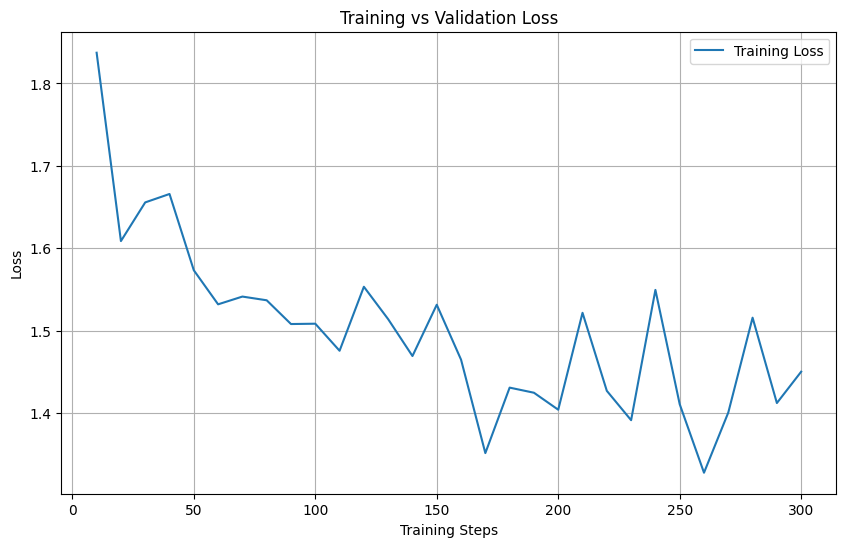

plot_loss completed in 0.37 seconds.
inference completed in 36.06 seconds.
['امیر، یک Student جذاب 23 ساله بود که به یک دانشگاه مشهور در تهران می\u200cپرداخت. او با به دنبال یک کار بعد از�olfش، به کار خود در یک شرکت در مرکز شهر پرداخت و در طول روزهای لامپ، از یک دانشگاه پرطرفدار را می\u200cآمخت.\n\nدر اواخر سالแรก، امیر به یک دانشگاه محبوب در شهر تهران نقل وernel کرد و تصمیم گرفت به تحصیل در رشته مهندسی هسته\u200cای در این دانشگاه بپردازد. در یک روز که در حال دیدن این دانشگاه، امیر متوجه شد که این دانشگاه بسیار زیبا و همواسا است. به همین خاطر، او ناامیدی نکرد و تصمیم گرفت در آن دانشگاه بدرود کند.\n\nدر اولین روزان học، امیر با یک گروه منظم و مکرر در حال تعامل قرار گرفت. او با چندستان به نام ساед، زهرا و کامیل متوسलعت آشنا شد و این پنجคน از همان روزها به عنوان یک گروه قوی برای یافتن، درک و کمک هم به nhau در حال تمرکز شدند. این دو گروه به راحتی با هم همکار و همزمانی شدند.\n\nامیر در طول دو سال تحصیل خود در دانشگاه از فرصت\u200cهایมากมาย برخوردار شد. او با کادرهای دانشگاه مشورتی به نام\u2

In [2]:
from IPython.display import clear_output
!pip install pip3-autoremove -q
!pip-autoremove torch torchvision torchaudio -y
!pip install torch torchvision torchaudio xformers --index-url https://download.pytorch.org/whl/cu121 -q
!pip install unsloth -q
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git -q
!pip install --upgrade --no-cache-dir transformers -q
clear_output()

import time, subprocess, json, torch, matplotlib.pyplot as plt
from datasets import Dataset

print("Soft Prompts Overview:")
print("Soft prompts are continuous embeddings that adapt a pretrained language model to new tasks by updating only a small set of additional parameters. The three main methods are Prefix Tuning, Prompt Tuning, and P-Tuning. I have chosen Prompt Tuning due to its simplicity and efficiency, as only the prompt parameters are updated while the base model remains frozen.")

def time_it(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        res = func(*args, **kwargs)
        print(f"{func.__name__} completed in {time.time()-start:.2f} seconds.")
        return res
    return wrapper

@time_it
def load_quantized_model():
    from unsloth import FastLanguageModel
    max_seq_length = 2048
    dtype = None
    load_in_4bit = True
    quantized_model, tokenizer = FastLanguageModel.from_pretrained(
        model_name="unsloth/Llama-3.2-3B-Instruct",
        max_seq_length=max_seq_length,
        dtype=dtype,
        load_in_4bit=load_in_4bit,
    )
    lora_model = FastLanguageModel.get_peft_model(
        quantized_model,
        r=16,
        target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
        lora_alpha=16,
        lora_dropout=0,
        bias="none",
        use_gradient_checkpointing="unsloth",
        random_state=3407,
        use_rslora=False,
    )
    return lora_model, tokenizer, max_seq_length

@time_it
def download_data(url, dest):
    subprocess.run(f'wget -q "{url}" -O {dest}', shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

@time_it
def read_dataset(ds_path):
    dataset = []
    with open(ds_path, 'r') as f:
        for line in f:
            data = json.loads(line)
            convos = [msg for msg in data if msg['role'] in ['user', 'assistant']]
            dataset.append({"conversations": convos})
    return dataset

@time_it
def format_prompts(ds, tokenizer):
    def formatting_func(examples):
        convos = examples["conversations"]
        texts = [tokenizer.apply_chat_template(convo, tokenize=False, add_generation_prompt=False) for convo in convos]
        return {"text": texts}
    ds = ds.filter(lambda ex: len(ex["conversations"]) > 0)
    ds = ds.map(formatting_func, batched=True)
    return ds

@time_it
def fine_tune_model(lora_model, tokenizer, dataset, max_seq_length):
    from trl import SFTTrainer
    from transformers import TrainingArguments, DataCollatorForSeq2Seq
    from unsloth import is_bfloat16_supported
    torch.cuda.empty_cache()
    trainer = SFTTrainer(
        model=lora_model,
        tokenizer=tokenizer,
        train_dataset=dataset,
        dataset_text_field="text",
        max_seq_length=max_seq_length,
        data_collator=DataCollatorForSeq2Seq(
            tokenizer=tokenizer,
            padding=True,
            pad_to_multiple_of=8,
        ),
        dataset_num_proc=2,
        packing=False,
        args=TrainingArguments(
            report_to="none",
            per_device_train_batch_size=4,
            gradient_accumulation_steps=4,
            warmup_steps=20,
            max_steps=300,
            learning_rate=1.5e-4,
            fp16=not is_bfloat16_supported(),
            bf16=is_bfloat16_supported(),
            logging_steps=10,
            optim="adamw_8bit",
            weight_decay=0.02,
            lr_scheduler_type="linear",
            seed=3407,
            output_dir="outputs",
        ),
    )
    from unsloth.chat_templates import train_on_responses_only
    trainer = train_on_responses_only(
        trainer,
        instruction_part="<|start_header_id|>user<|end_header_id|>\n\n",
        response_part="<|start_header_id|>assistant<|end_header_id|>\n\n",
    )
    stats = trainer.train()
    return trainer, stats

@time_it
def plot_loss(trainer):
    logs = trainer.state.log_history
    steps = [log["step"] for log in logs if "loss" in log]
    train_loss = [log["loss"] for log in logs if "loss" in log]
    eval_loss = [log["eval_loss"] for log in logs if "eval_loss" in log]
    plt.figure(figsize=(10,6))
    plt.plot(steps, train_loss, label="Training Loss")
    if eval_loss:
        plt.plot(steps[:len(eval_loss)], eval_loss, label="Validation Loss", linestyle="--")
    plt.xlabel("Training Steps")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.grid(True)
    plt.savefig("loss_curves.png")
    plt.show()

@time_it
def inference(lora_model, tokenizer):
    from unsloth import FastLanguageModel
    finetuned_model = FastLanguageModel.for_inference(lora_model)
    messages = [{"role": "user", "content": "Tell a story about a student at the University of Tehran."}]
    inputs = tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_tensors="pt",
    ).to("cuda")
    input_ids = inputs
    attention_mask = (input_ids != tokenizer.pad_token_id).long()
    outputs = finetuned_model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_new_tokens=1024,
        use_cache=True,
        temperature=1.5,
        min_p=0.1
    )
    decoded = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    clean = []
    for resp in decoded:
        if "user\n\n" in resp:
            resp = resp.split("user\n\n", 1)[1]
        if "assistant\n\n" in resp:
            resp = resp.split("assistant\n\n", 1)[1]
        clean.append(resp)
    return clean

lora_model, tokenizer, max_seq_length = load_quantized_model()
download_data("https://huggingface.co/datasets/miladmim/slim-orca-dedup-chat-50k-persian/resolve/main/data.jsonl?download=true", "data.jsonl")
ds_list = read_dataset("data.jsonl")
ds = Dataset.from_list(ds_list)
ds = format_prompts(ds, tokenizer)
trainer, stats = fine_tune_model(lora_model, tokenizer, ds, max_seq_length)
plot_loss(trainer)
result = inference(lora_model, tokenizer)
print(result)
lora_model.save_pretrained("lora_adapter")
